![Alt text](https://www.saintpeters.edu/wp-content/uploads/blogs.dir/230/files/2022/11/SPU-Sesq-1.png)


# Student Information

<table style="width:100%">
  <tr>
    <td style="text-align:left"><font color="green"><b>Contributor 1:</b></font></td>
    <td style="text-align:left"><b>Jennifer Valencia</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="blue"><b>Contributor 2:</b></font></td>
    <td style="text-align:left"><b>Joyail Tokas</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="purple"><b>Class:</b></font></td>
    <td style="text-align:left"><b>DS-600: Data Mining</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="orange"><b>Task:</b></font></td>
    <td style="text-align:left"><b>Capstone Project.</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="brown"><b>Topic:</b></font></td>
    <td style="text-align:left"><b>AI Powered Phishing Attack Detection</b></td>
  </tr>
</table>


# AI Powered Phishing Attack Detection

#### Business Needs:
Phishing attacks pose a significant threat to individuals and organizations by tricking victims into disclosing sensitive information. To combat this, there is a pressing need for an effective detection system that can differentiate between legitimate and phishing URLs.

#### Problem Statement:
Phishing is a type of anomaly that consists of malicious attacks intended to trick people into divulging sensitive information (Justindhas et. al., 2023). They are frequently formatted as URLs that mimic legitimate websites. Failure to identify these attacks can result in significant repercussions, such as identity theft, malware distribution, financial threats, and security breaches.

#### Objective:
This project will incorporate machine learning algorithms to identify potential phishing attempts through deceptive URLs. Some approaches to be explored include K-Means Clustering, DBSCAN, Support Vector Machine, and Deep Learning. The models will be trained and tested using the PhiUSIIL Phishing URL Dataset from UC Irvine Machine Learning Repository, which comprises 134,850 legitimate and 100,945 phishing URLs. The performance of each of the models will be evaluated to determine which one achieves the highest accuracy when distinguishing between legitimate and illegitimate URLs.

#### References:
Justindhas, Y., Raghul, V., Pramadeish S., Prakash, S. (2024). A Comprehensive Review on An Ensemble-Based Machine Learning Approach for Phishing Website Detection. In 2024 2nd International Conference on Computer, Communication and Control (IC4), 1-6, https://ieeexplore.ieee.org/document/10486561

Prasad, A. & Chandra, S. (2024). PhiUSIIL Phishing URL (Website). UCI Machine Learning Repository. https://doi.org/10.1016/j.cose.2023.103545

#### Credits:
| Image                      | First Name | Last Name       | Student ID | Class Level |
|----------------------------|------------|-----------------|------------|-------------|
| <img src="../Media_Files/Jennifer_Valencia.jpeg" alt="Jennifer Valencia" width="100"/> | Jennifer   | Valencia      | 0865975    | Graduate    |
| <img src="../Media_Files/Joyail_Tokas.jpeg" alt="Joyail Tokas" width="100"/> | Joyail     | Tokas         | 1030128    | Graduate    |


---


## <span style="color:purple">📝 Task 1:</span> Data Acquisition & EDA Process

✅ Exploratory Data Analysis: Installing all the project required libraries

In [42]:
## Required Libraries 
import numpy as np # For Math/linear algebra
import pandas as pd # For Data processing
import io
from io import StringIO

## Data Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as mpatches 


## Time Series Data Libraries 
import datetime
from datetime import timedelta

## ML Metric Performance Library
from sklearn.metrics import mean_squared_error, mean_absolute_error

from math import sqrt

##Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Markdown comments design 
from IPython.display import display, Markdown
import emoji
from IPython.core.display import display, HTML

# Ensure all output is displayed from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Modify the CSS style of the output cell to manage the overflow
from IPython.display import display, HTML, Markdown
display(HTML("""
<style>
.output {
    display: block;
    max-height: 1800px; 
    overflow-y: auto;  
    overflow-x: auto; 
}
</style>
"""))

# Increase the maximum rows displayed in output
import pandas as pd
pd.set_option('display.max_rows', 1500)

## Label Encoding 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


![Alt text](https://miro.medium.com/v2/resize:fit:1400/1*kEgCUgZmYnFXcZ253UiIDQ.png)

✅ Exploratory Data Analysis: Acquiring the dataset

In [7]:
# Read the dataset into a pandas DataFrame
phish = pd.read_csv('../Dataset/PhiUSIIL_Phishing_URL_Dataset.csv')
phish.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


Exploring a pandas DataFrame involves key methods for in-depth analysis:

- **data.describe():** Provides statistical summaries for numerical columns.
- **data.info():** Details the DataFrame's structure, data types, and missing values.
- **data.shape:** Shows the total number of rows and columns, indicating the dataset's size and scope.

![Alt text](https://res.cloudinary.com/practicaldev/image/fetch/s--uCYTIuwT--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/3hn73nplm0nv0ct18vg0.jpg)

## a)- Descriptive Analysis:

In [8]:
phish.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [9]:
def summarize_dataset(dataframe):
    """
    This function would summarize our exam pandas DataFrame.

    Args:
    dataframe (pd.DataFrame): The pandas DataFrame to be summarized.

    Returns:
    pd.DataFrame: DataFrame containing summary information including non-null counts and data types.
    pd.DataFrame: DataFrame containing the number of rows and columns.
    """
    # Extracting info as DataFrame
    info_df = pd.DataFrame(dataframe.dtypes).reset_index()
    info_df.columns = ['Column', 'Data Type']
    info_df['Non-Null Count'] = dataframe.notnull().sum().values

    # Creating a DataFrame for shape
    shape_df = pd.DataFrame({'Aspect': ['Number of Rows', 'Number of Columns'],
                             'Value': [dataframe.shape[0], dataframe.shape[1]]})

    return info_df, shape_df

# Applying the function to the loaded data
dataset_info_df, dataset_shape_df = summarize_dataset(phish)

In [10]:
dataset_info_df

,Column,Data Type,Non-Null Count
0,FILENAME,object,235795
1,URL,object,235795
2,URLLength,int64,235795
3,Domain,object,235795
4,DomainLength,int64,235795
5,IsDomainIP,int64,235795
6,TLD,object,235795
7,URLSimilarityIndex,float64,235795
8,CharContinuationRate,float64,235795
9,TLDLegitimateProb,float64,235795


In [11]:
dataset_shape_df

,Aspect,Value
0,Number of Rows,235795
1,Number of Columns,56


## b)- Detection and Treatment of MISSING DATA:

In [12]:
def count_null_values(dataframe):
    """
    Function to count null values in each column of a pandas DataFrame.

    Args:
    dataframe (pd.DataFrame): The pandas DataFrame to be analyzed.

    Returns:
    pd.DataFrame: DataFrame containing the count of null values in each column.
    """
    null_counts = dataframe.isnull().sum()
    null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])
    null_counts_df = null_counts_df[null_counts_df['Null Count'] > 0].reset_index()
    null_counts_df.rename(columns={'index': 'Column'}, inplace=True)
    return null_counts_df

# Applying the function to the renamed data
null_counts_df = count_null_values(phish)
null_counts_df

,Column,Null Count


## C)- Exploratory Data Analysis (EDA)

In [24]:
def plot_histogram(dataframe, column, bins=30):
    """
    Plot a colorful histogram for a specific column with mean threshold.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    bins (int): Number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    mean_value = dataframe[column].mean()
    sns.histplot(dataframe[column], bins=bins, kde=True, color='dodgerblue', edgecolor='black')
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.grid(True)
    plt.show()

def plot_countplot(dataframe, column):
    """
    Plot a colorful count plot for a specific column with legends.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataframe, x=column, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.grid(True)
    plt.show()

def plot_correlation_matrix(dataframe):
    """
    Plot an enhanced correlation matrix for the DataFrame.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    """
    plt.figure(figsize=(16, 12))
    corr = dataframe.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def plot_boxplot(dataframe, column):
    """
    Plot an enhanced boxplot for a specific column with mean threshold.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=column, palette='Set3')
    mean_value = dataframe[column].mean()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


def plot_pairplot(dataframe, columns):
    """
    Plot an enhanced pairplot for specific columns.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    columns (list): List of columns to plot.
    """
    pairplot = sns.pairplot(dataframe[columns], diag_kind='kde', palette='husl')
    pairplot.fig.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()


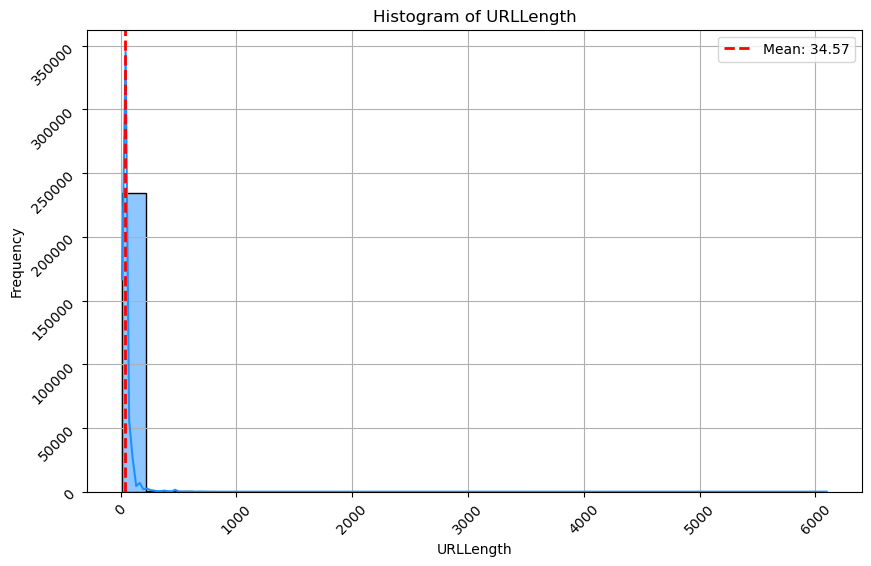

In [25]:
plot_histogram(phish, 'URLLength')

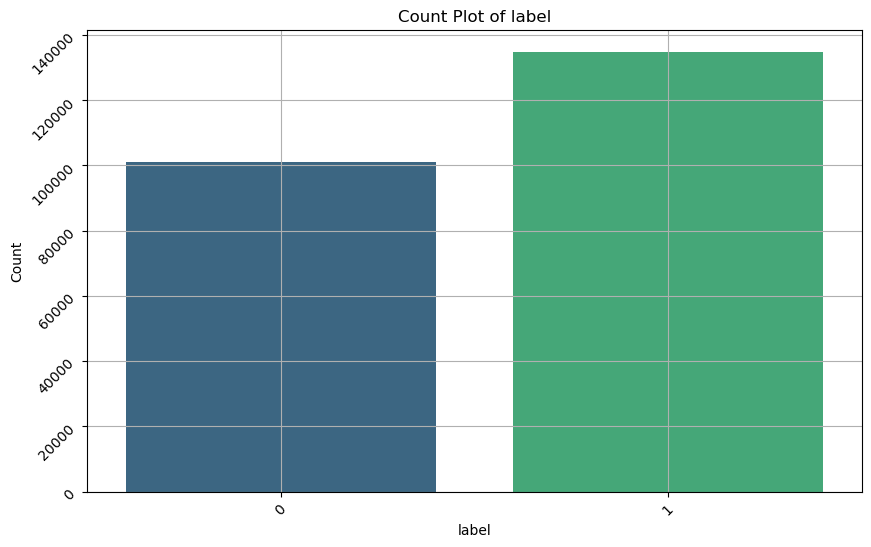

In [26]:
plot_countplot(phish, 'label')

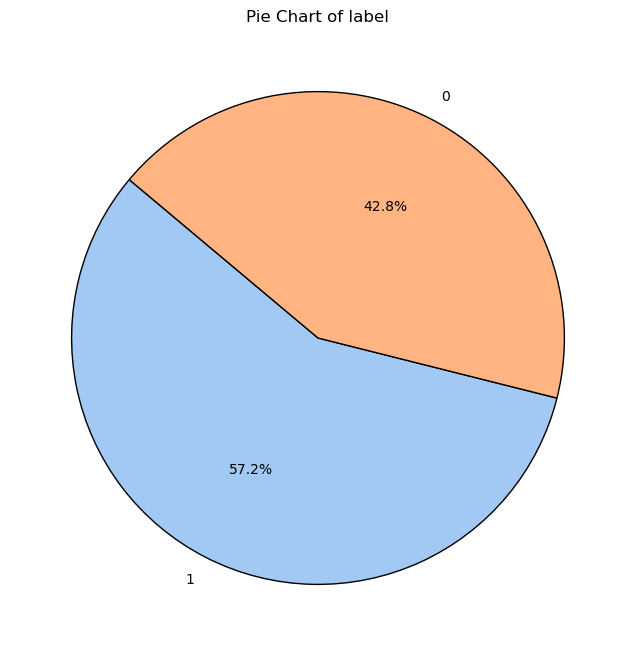

In [30]:
def plot_pie_chart(dataframe, column):
    """
    Plot a pie chart showing the percentage distribution of a specific column.
    Args:
    dataframe (pd.DataFrame): The pandas DataFrame.
    column (str): The column to plot.
    """
    plt.figure(figsize=(8, 8))
    data = dataframe[column].value_counts()
    labels = data.index
    colors = sns.color_palette('pastel')[0:len(labels)]
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Pie Chart of {column}')
    plt.show()

plot_pie_chart(phish, 'label')


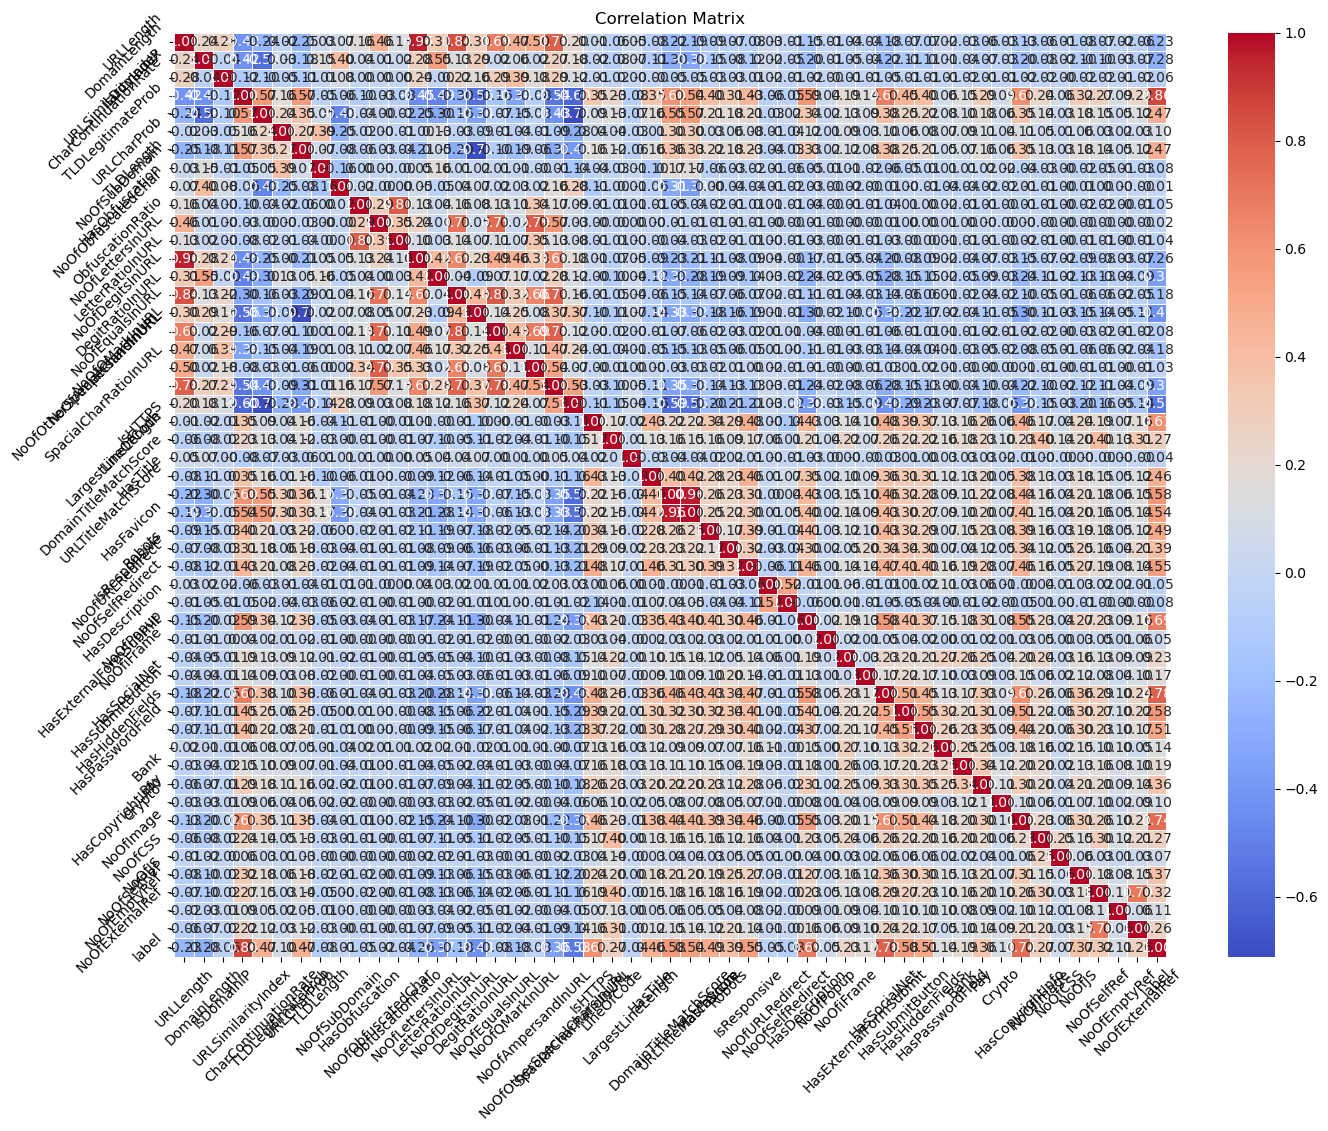

In [27]:
plot_correlation_matrix(phish)

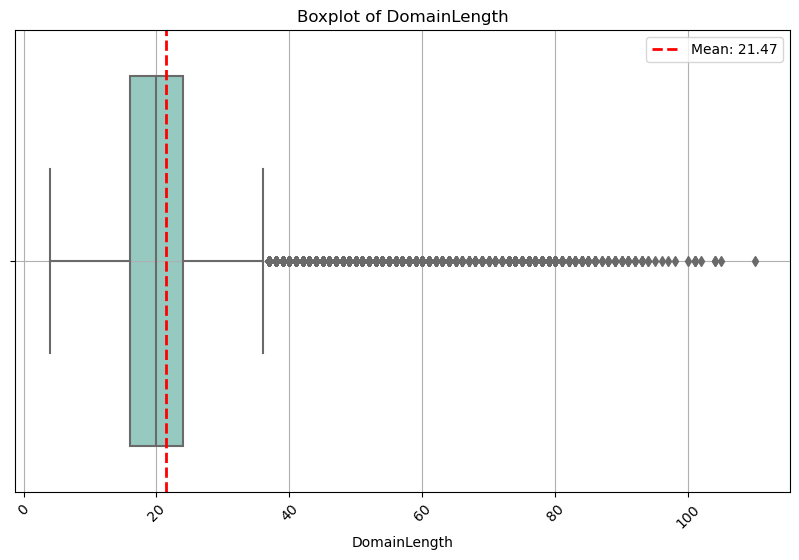

In [28]:
plot_boxplot(phish, 'DomainLength')

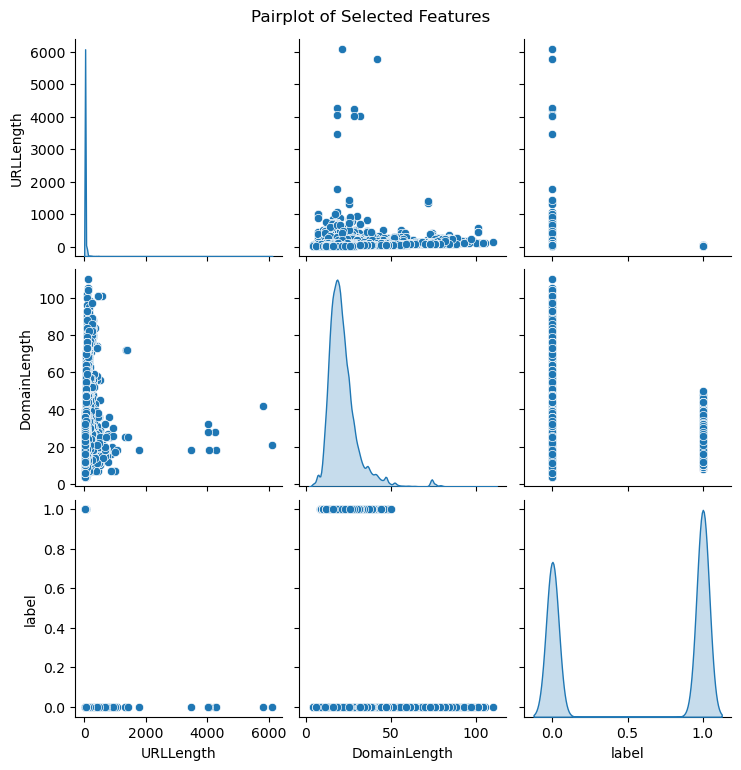

In [29]:
pairplot_columns = ['URLLength', 'DomainLength', 'label']
plot_pairplot(phish, pairplot_columns)

## d)- Feature Analysis

In [38]:
# Preprocess the dataset
def preprocess_data(dataframe):
    # Drop non-numeric columns that are not useful
    dataframe = dataframe.drop(columns=['FILENAME', 'URL', 'Domain', 'TLD'])

    # Handle missing values
    dataframe.fillna(dataframe.median(), inplace=True)

    # Encode categorical columns if any
    label_encoder = LabelEncoder()
    for column in dataframe.select_dtypes(include=['object']).columns:
        dataframe[column] = label_encoder.fit_transform(dataframe[column])

    return dataframe

In [39]:
# Preprocess the phish dataset
phish_preprocessed = preprocess_data(phish)

In [43]:
# Calculate and plot enhanced feature importance
def feature_importance(dataframe, target_column):
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    return feature_importance_df

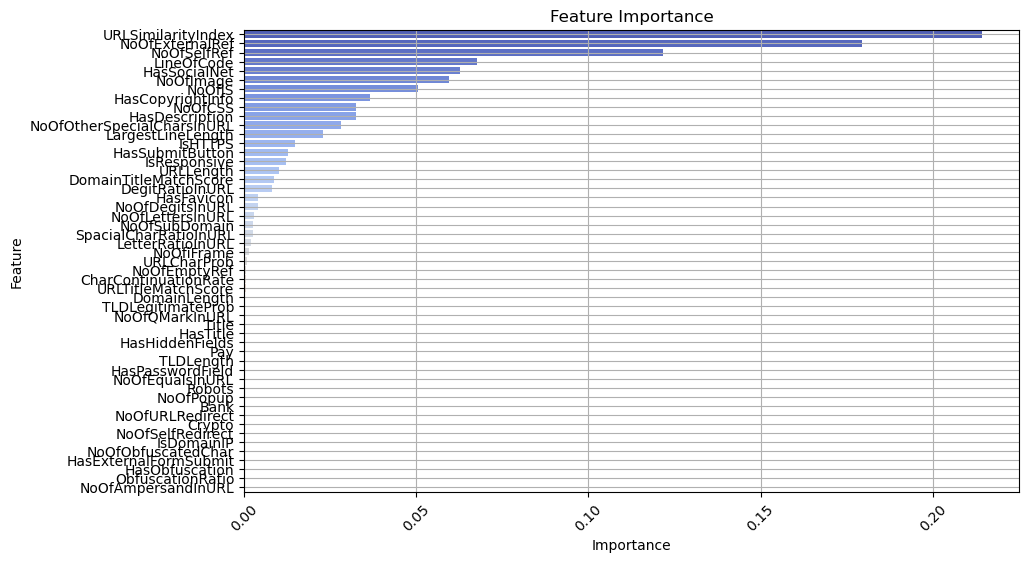

In [44]:
# Calculate and plot feature importance
feature_importance_df = feature_importance(phish_preprocessed, 'label')

## e)- Narrowing down the overall features

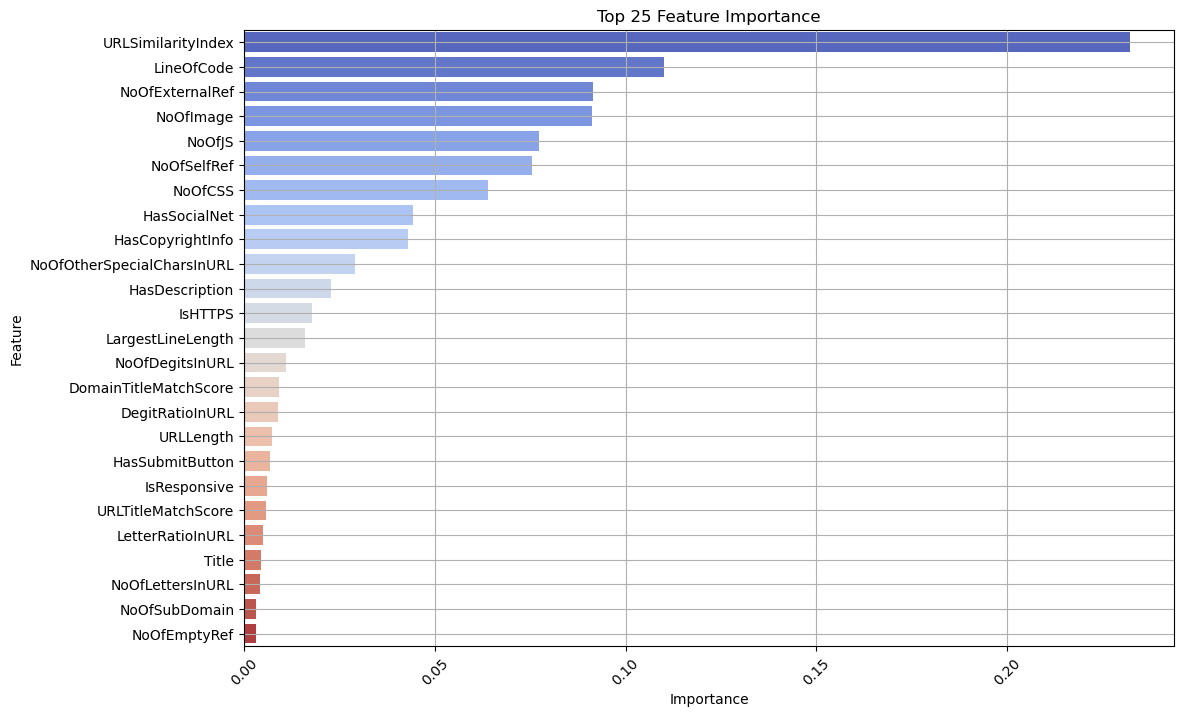

In [45]:
def feature_importance(dataframe, target_column):
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(25)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
    plt.title('Top 25 Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    return feature_importance_df

# Calculate and plot top 25 feature importance
feature_importance_df = feature_importance(phish_preprocessed, 'label')
top_25_features = feature_importance_df['Feature'].tolist()


## f)- Create phish_df with Top 25 Features

In [46]:
# Create phish_df with top 25 features and the target column
phish_df = phish_preprocessed[top_25_features + ['label']]
phish_df.head()

,URLSimilarityIndex,LineOfCode,NoOfExternalRef,NoOfImage,NoOfJS,NoOfSelfRef,NoOfCSS,HasSocialNet,HasCopyrightInfo,NoOfOtherSpecialCharsInURL,...,URLLength,HasSubmitButton,IsResponsive,URLTitleMatchScore,LetterRatioInURL,Title,NoOfLettersInURL,NoOfSubDomain,NoOfEmptyRef,label
0,100.0,558,124,34,28,119,20,0,1,1,...,31,1,1,0.000000,0.581,197871,18,1,0,1
1,100.0,618,217,50,8,39,9,1,1,2,...,23,1,0,55.555556,0.391,93363,9,1,0,1
2,100.0,467,5,10,7,42,2,0,1,2,...,29,1,1,46.666667,0.517,187338,15,2,2,1
3,100.0,6356,31,3,15,22,27,1,1,1,...,26,1,1,0.000000,0.500,81289,13,1,1,1
4,100.0,6089,85,244,34,72,15,1,1,1,...,33,1,1,100.000000,0.606,69782,20,1,1,1


## g)- Visualize the New Heatmap

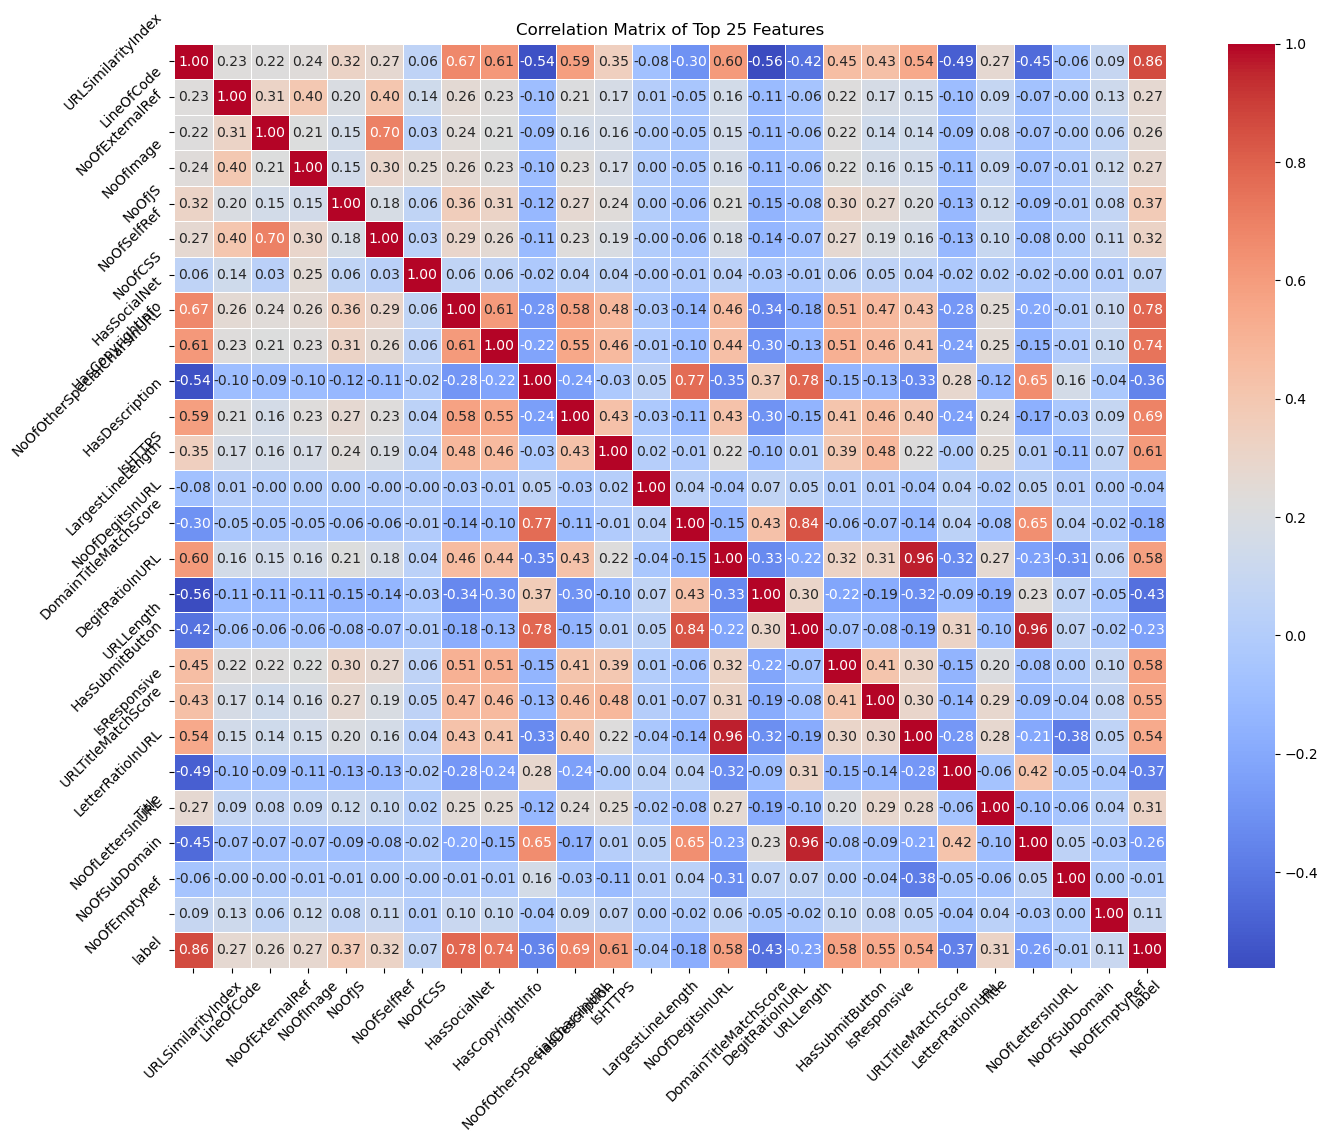

In [47]:
def plot_correlation_matrix(dataframe):
    plt.figure(figsize=(16, 12))
    corr = dataframe.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Top 25 Features')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

# Plot the new heatmap
plot_correlation_matrix(phish_df)


## <span style="color:purple">📝 Task 2:</span> Dataset Enrichment for Domain Name Scoring System


To enrich the dataset with a Domain Name Scoring System, we can use a combination of third-party libraries and APIs that provide security scores for domains. One popular library is pyhunter which interacts with the Hunter.io API for domain security information. Additionally, whois can provide domain registration information, and urlscan.io can provide detailed information about the safety of URLs.

## a)- Setting Up Libraries and APIs

First, we need to install the required libraries and set up API keys for any third-party services used.



In [48]:
!pip install pyhunter python-whois requests

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for python-whois from https://files.pythonhosted.org/packages/23/ad/c03f9618486ffb07c67f443012374f1acf3781074e0935bff553a87eb6eb/python_whois-0.9.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   --- ------------------------------------ 10.2/103.3 kB ? eta -:--:--
   --- ------------------------------------ 10.2/

## b) Creating the Domain Name Scoring Function

We'll create a function that takes a domain, queries the APIs, and returns a safety score based on the responses. For demonstration purposes, I'll use a simplified scoring system. https://hunter.io/discover

## c)- Enriching the Dataset

We'll apply the scoring function to the domains in the dataset and add the scores as a new column. https://hunter.io/api-keys



In [49]:
import pandas as pd
import whois
import requests

# Sample API key for Hunter.io (Replace with your own API key)
HUNTER_API_KEY = '40e92fa12aa41c696a0ff807715c3867fc4b41a8'

def get_whois_info(domain):
    try:
        domain_info = whois.whois(domain)
        if domain_info:
            return domain_info
    except:
        return None

def get_hunter_info(domain):
    url = f'https://api.hunter.io/v2/domain-search?domain={domain}&api_key={HUNTER_API_KEY}'
    try:
        response = requests.get(url)
        data = response.json()
        if 'data' in data:
            return data['data']
    except:
        return None

def get_urlscan_info(domain):
    url = f'https://urlscan.io/api/v1/search/?q=domain:{domain}'
    try:
        response = requests.get(url)
        data = response.json()
        if 'results' in data:
            return data['results']
    except:
        return None

def domain_score(domain):
    score = 0
    whois_info = get_whois_info(domain)
    hunter_info = get_hunter_info(domain)
    urlscan_info = get_urlscan_info(domain)
    
    if whois_info:
        # Simplified scoring: score increases if the domain has a valid whois record
        score += 1
    
    if hunter_info:
        # Simplified scoring: score increases if Hunter.io finds domain information
        score += 1
    
    if urlscan_info:
        # Simplified scoring: score increases if URLScan.io finds scan results for the domain
        score += 1
    
    return score

In [ ]:
# Load the initial dataset
file_path = '../Dataset/PhiUSIIL_Phishing_URL_Dataset.csv'
phish = pd.read_csv(file_path)

# Extract the Domain column and compute the domain score
phish['Domain'] = phish['URL'].apply(lambda x: x.split('/')[2])
phish['Domain_Score'] = phish['Domain'].apply(domain_score)

# Display the enriched dataframe with domain scores
phish[['URL', 'Domain', 'Domain_Score']].head()

In [ ]:
# Save the enriched dataframe
phish.to_csv('../Dataset/PhiUSIIL_Phishing_URL_Dataset_Enriched.csv', index=False)

## <span style="color:purple">📝 Task 3:</span> Pre- Model Deployment & Analysis  


## <span style="color:purple">📝 Task 4:</span> Predictive Analysis  


## <span style="color:purple">📝 Task 5:</span>  Final Conclusion
